In [1]:
%pylab inline
from app.analysis import Quote
reit = Quote.screen_funds('Alternatives', min_assets=1, max_expense=.6)
commodity = Quote.screen_funds('Commodities', min_assets=.4, max_expense=1)
print(len(reit), len(commodity))
quote = Quote(reit + commodity, 126, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

Populating the interactive namespace from numpy and matplotlib
12 14
from 2019-01-29 to 2019-07-29 - 26


In [2]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

21


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
XLRE,122,0.081697,0.329197,0.224062,11.802417,4.835459
ICF,122,0.077516,0.331938,0.209617,11.194877,4.991450
IYR,122,0.069729,0.314446,0.196512,10.184739,4.963136
VNQ,122,0.068025,0.321327,0.186999,9.928531,5.135487
BAR,122,0.062449,0.326536,0.166941,8.715599,5.285189
SGOL,122,0.061129,0.326820,0.162757,8.615921,5.214699
IAU,122,0.060974,0.329162,0.161128,8.512336,5.218069
GLD,122,0.060522,0.326372,0.161123,8.509433,5.335434
USRT,122,0.057706,0.329987,0.150823,8.473472,5.198662


evicted RWX 0.849 0.128
evicted PSLV 0.782 -0.098
evicted VNQI 0.436 0.256
evicted USO 0.301 -0.003
evicted PPLT 0.331 -0.176
retry backlogs ['XLRE', 'SCHH', 'RWR', 'USRT', 'GLD', 'RWO', 'VNQ', 'REET', 'SGOL', 'IAU', 'IYR', 'SLV', 'GSG'] at 0.905/-0.51 - 0.266
evicted SLV 0.723 -0.119
evicted GSG 0.264 0.028
retry backlogs ['XLRE', 'SGOL', 'SCHH', 'RWR', 'USRT', 'VNQ', 'GLD', 'RWO', 'IAU', 'REET', 'IYR'] at 0.910/-0.52 - 0.266
retry backlogs ['SCHH', 'RWR', 'USRT', 'VNQ', 'GLD', 'IYR', 'RWO', 'REET', 'SGOL', 'IAU', 'ICF'] at 0.915/-0.53 - 0.269
retry backlogs ['SCHH', 'RWR', 'USRT', 'VNQ', 'GLD', 'IYR', 'RWO', 'REET', 'SGOL', 'IAU', 'ICF'] at 0.920/-0.54 - 0.269
retry backlogs ['SCHH', 'RWR', 'USRT', 'VNQ', 'GLD', 'IYR', 'RWO', 'REET', 'SGOL', 'IAU', 'ICF'] at 0.925/-0.55 - 0.269
retry backlogs ['SCHH', 'RWR', 'USRT', 'VNQ', 'GLD', 'IYR', 'RWO', 'REET', 'SGOL', 'IAU', 'ICF'] at 0.930/-0.56 - 0.269
retry backlogs ['SCHH', 'RWR', 'USRT', 'VNQ', 'GLD', 'IYR', 'RWO', 'REET', 'SGOL', 'IAU',

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,122.0,0.066997,0.221761,-0.551381,-0.069209,0.071810,0.215215,0.621995,0.266327,9.591117,2.881279
XLRE,122.0,0.081697,0.329197,-0.868695,-0.099191,0.133846,0.267477,0.853957,0.224062,11.802417,4.835459
BAR,122.0,0.062449,0.326536,-0.625200,-0.109756,0.060277,0.201982,1.145879,0.166941,8.715599,5.285189
REM,122.0,0.028918,0.196876,-0.633750,-0.082240,0.057208,0.166773,0.390737,0.106574,4.319111,7.076859


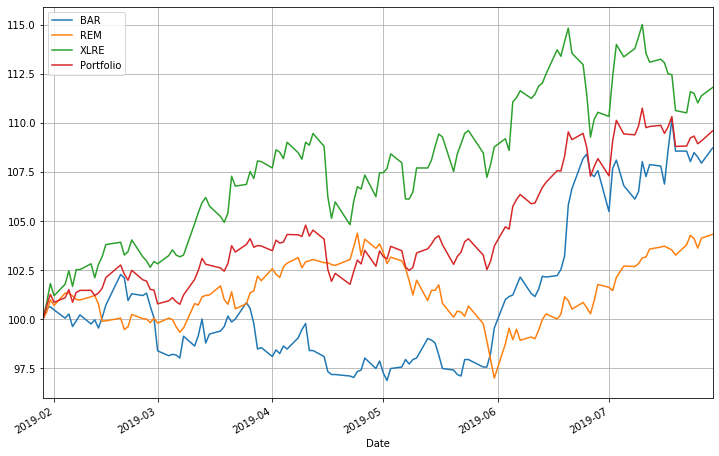

In [3]:
bounds = .05, .09
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(_lambda=1, bounds=bounds)
quote.setup_mask(['BAR', 'REM', 'XLRE'])
sd.update(quote.optimize_portfolio(_lambda=1, bounds=bounds))
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(_lambda=1, bounds=bounds))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)